In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Gibbs Sampling

Gibbs sampling is a Markov Chain Monte Carlo (MCMC) algorithm for obtaining a sequence of observations approximated from a specified multivariate probability distribution. This method is particularly useful when direct sampling is difficult but conditional sampling is easier.

## Steps of Gibbs Sampling

Given a joint probability distribution \( P(X_1, X_2, \ldots, X_n) \), the goal is to sample from this joint distribution. The steps are as follows:

1. **Initialize** \( X_1^{(0)}, X_2^{(0)}, \ldots, X_n^{(0)} \) with some initial values.
2. **Iterate** the following steps for \( t = 1 \) to \( T \) (number of iterations):
   - Sample \( X_1^{(t)} \) from the conditional distribution \( P(X_1 \mid X_2^{(t-1)}, X_3^{(t-1)}, \ldots, X_n^{(t-1)}) \)
   - Sample \( X_2^{(t)} \) from the conditional distribution \( P(X_2 \mid X_1^{(t)}, X_3^{(t-1)}, \ldots, X_n^{(t-1)}) \)
   - Continue this process until \( X_n^{(t)} \) is sampled from \( P(X_n \mid X_1^{(t)}, X_2^{(t)}, \ldots, X_{n-1}^{(t)}) \)

After sufficient iterations, the sequence \( \{ X_1^{(t)}, X_2^{(t)}, \ldots, X_n^{(t)} \} \) will converge to a stationary distribution, which is the joint distribution \( P(X_1, X_2, \ldots, X_n) \).

## Example

Consider a bivariate distribution with two random variables \( X \) and \( Y \):

1. **Initialize** \( X^{(0)} = x_0 \) and \( Y^{(0)} = y_0 \)
2. **Iterate** for \( t = 1 \) to \( T \):
   - Sample \( X^{(t)} \) from the conditional distribution \( P(X \mid Y = y^{(t-1)}) \)
   - Sample \( Y^{(t)} \) from the conditional distribution \( P(Y \mid X = x^{(t)}) \)

After sufficient iterations, the pairs \( (X^{(t)}, Y^{(t)}) \) will approximate the joint distribution \( P(X, Y) \).

## Mathematical Formulation

The algorithm iteratively samples from the conditional distributions:

\[
\begin{aligned}
  X_1^{(t)} &\sim P(X_1 \mid X_2^{(t-1)}, X_3^{(t-1)}, \ldots, X_n^{(t-1)}) \\
  X_2^{(t)} &\sim P(X_2 \mid X_1^{(t)}, X_3^{(t-1)}, \ldots, X_n^{(t-1)}) \\
  &\vdots \\
  X_n^{(t)} &\sim P(X_n \mid X_1^{(t)}, X_2^{(t)}, \ldots, X_{n-1}^{(t)})
\end{aligned}
\]

The above steps ensure that each variable is sampled from its full conditional distribution given the current values of the other variables.

## Convergence

Gibbs sampling converges to the joint distribution \( P(X_1, X_2, \ldots, X_n) \) under the following conditions:
- The chain must be irreducible, meaning it's possible to get from any state to any other state.
- The chain must be aperiodic, meaning it does not get trapped in cycles.
- The chain must have a stationary distribution that is the desired joint distribution.

With these conditions satisfied, the samples obtained from Gibbs sampling will be representative of the joint distribution after a sufficient number of iterations.



In [1]:
import random
import math

def normal_sample(mean, variance):
    """Generate a sample from a normal distribution with given mean and variance."""
    return random.gauss(mean, math.sqrt(variance))

def gibbs_sampling(mu_x, mu_y, sigma_x, sigma_y, rho, num_samples, burn_in):
    """Perform Gibbs sampling for a bivariate normal distribution."""
    
    # Initialize the chain
    x = 0
    y = 0
    
    samples = []
    
    for _ in range(num_samples + burn_in):
        # Sample X given Y
        mean_x_given_y = mu_x + rho * (sigma_x / sigma_y) * (y - mu_y)
        var_x_given_y = (1 - rho**2) * sigma_x**2
        x = normal_sample(mean_x_given_y, var_x_given_y)
        
        # Sample Y given X
        mean_y_given_x = mu_y + rho * (sigma_y / sigma_x) * (x - mu_x)
        var_y_given_x = (1 - rho**2) * sigma_y**2
        y = normal_sample(mean_y_given_x, var_y_given_x)
        
        # Only collect samples after burn-in period
        if _ >= burn_in:
            samples.append((x, y))
    
    return samples

# Parameters for the bivariate normal distribution
mu_x = 0
mu_y = 0
sigma_x = 1
sigma_y = 1
rho = 0.8

# Sampling parameters
num_samples = 1000
burn_in = 100

samples = gibbs_sampling(mu_x, mu_y, sigma_x, sigma_y, rho, num_samples, burn_in)

# Print the first 10 samples
for i in range(10):
    print(f"Sample {i+1}: X = {samples[i][0]}, Y = {samples[i][1]}")


Sample 1: X = 0.7698054602266544, Y = 0.4644009664955905
Sample 2: X = -0.7214238832398219, Y = -0.013118337217707943
Sample 3: X = -0.16934990727145832, Y = 0.23032745494483825
Sample 4: X = 0.8463125212845564, Y = 0.44656838520228154
Sample 5: X = 0.2759866010839239, Y = 0.44313183986134685
Sample 6: X = 1.1551713642017243, Y = 1.3050652304564654
Sample 7: X = 1.437286063550208, Y = 0.5836582390756785
Sample 8: X = 0.9844858049943467, Y = 0.9862754136096997
Sample 9: X = -0.3821777119712778, Y = 0.26223650140543897
Sample 10: X = 0.4247310326292536, Y = -1.0945415066546345


$$
$\textbf{Metropolis Algorithm}$

$\textbf{Goal:}$ To generate a sequence of samples from a target probability distribution p(x), which may be difficult to sample from directly.

$\textbf{Steps:}$

1. $\textbf{Initialize:}$
   - Start with an initial value $ x_0 $.
   - Set the number of iterations N (i.e., the length of the Markov chain).
   - Choose a proposal distribution  q(x' $\mid$ x)  which suggests a new point $ x' $ given the current point x.

2. $\textbf{Iteration:}$
   For each iteration  t = 1, 2, $\dots$, N 
   - $\textbf{Propose a new point:}$
     - Generate a candidate x' from the proposal distribution q(x' $\mid$ x_t).
   - $\textbf{Calculate the acceptance probability:}$
     $$
     \alpha = \min\left(1, \frac{p(x') \cdot q(x_t \mid x')}{p(x_t) \cdot q(x' \mid x_t)}\right)
     $$
     - If the proposal distribution is symmetric, i.e.,  q(x' $\mid$ $x_t$) = q($x_t$ $\mid$ x') , then the acceptance probability simplifies to:
     $$
     \alpha = \min\left(1, \frac{p(x')}{p(x_t)}\right)
     $$
   - $\textbf{Accept or reject the proposal:}$
     - Generate a random number u uniformly distributed in $ [0, 1] $.
     - If u $\leq$ $\alpha$, accept the new point by setting $ x_{t+1}$ = x' .
     - Otherwise, reject the new point and set $x_{t+1}$ = $x_t$.

3. $\textbf{Output:}$
   - The sequence $x_1$, $x_2$, $\dots$, $x_N$  is a Markov chain that approximates samples from the target distribution p(x).

$\textbf{Key Points:}$
- The Metropolis algorithm is a special case of the Metropolis-Hastings algorithm where the proposal distribution is symmetric.
- It generates samples that form a Markov chain with the desired distribution p(x) as its stationary distribution.
- The algorithm is widely used for sampling in Bayesian inference and other applications where direct sampling from p(x)  is challenging.

$\textbf{Example:}$

Consider a target distribution p(x) proportional to $\exp(-x^2 / 2)$ (which is a standard normal distribution).

- Proposal distribution q(x' $\mid$ x)  could be  x' = x + $\epsilon$ , where $ \epsilon $ is sampled from a normal distribution with mean 0 and standard deviation $\sigma$ .
- The acceptance probability is:
$$
\alpha = \min\left(1, \frac{\exp(-x'^2 / 2)}{\exp(-x_t^2 / 2)}\right) = \min\left(1, \exp\left(\frac{x_t^2 - x'^2}{2}\right)\right)
$$

The algorithm then iteratively generates samples from the target distribution.
$$


import random
import math

def target_distribution(x):
    """Target distribution p(x) we want to sample from. Assume a standard normal distribution."""
    return math.exp(-x**2 / 2) / math.sqrt(2 * math.pi)

def metropolis_sampling(initial_x, num_samples, proposal_stddev):
    """Perform Metropolis algorithm for sampling from a target distribution."""
    
    # Initialize the chain
    x = initial_x
    
    samples = []
    
    for _ in range(num_samples):
        # Propose a new point x' using a normal distribution centered at the current x
        x_proposal = x + random.gauss(0, proposal_stddev)
        
        # Calculate the acceptance probability
        acceptance_prob = min(1, target_distribution(x_proposal) / target_distribution(x))
        
        # Accept or reject the proposal
        if random.uniform(0, 1) < acceptance_prob:
            x = x_proposal
        
        # Store the sample
        samples.append(x)
    
    return samples

# Sampling parameters
initial_x = 0
num_samples = 1000
proposal_stddev = 1.0

samples = metropolis_sampling(initial_x, num_samples, proposal_stddev)

# Print the first 10 samples
for i in range(10):
    print(f"Sample {i+1}: X = {samples[i]}")



$\textbf{Metropolis-Hastings Algorithm}$

$\textbf{Goal:}$ To generate a sequence of samples from a target probability distribution p(x), which may be difficult to sample from directly.

$\textbf{Steps:}$

1. $\textbf{Initialize:}$
   - Start with an initial value $ x_0 $.
   - Set the number of iterations N  (i.e., the length of the Markov chain).
   - Choose a proposal distribution q(x' $\mid$ x) which suggests a new point x'given the current point x.

2. $\textbf{Iteration:}$
   For each iteration t = 1, 2, $\dots$, N :
   - $\textbf{Propose a new point:}$
     - Generate a candidate x' from the proposal distribution q(x' $\mid$ x_t).
   - $\textbf{Calculate the acceptance probability:}$
     $$
     \alpha = \min\left(1, \frac{p(x') \cdot q(x_t \mid x')}{p(x_t) \cdot q(x' \mid x_t)}\right)
     $$
   - $\textbf{Accept or reject the proposal:}$
     - Generate a random number \( u \) uniformly distributed in $[0, 1]$.
     - If u $\leq$ $\alpha$ , accept the new point by setting $x_{t+1}$ = x'.
     - Otherwise, reject the new point and set $x_{t+1}$ = $x_t$.

3. $\textbf{Output:}$
   - The sequence $x_1$, $x_2$, $\dots$, $x_N$ is a Markov chain that approximates samples from the target distribution p(x).

$\textbf{Key Points:}$
- The Metropolis-Hastings algorithm is a generalization of the Metropolis algorithm where the proposal distribution q(x' $\mid$ x) does not need to be symmetric.
- It generates samples that form a Markov chain with the desired distribution p(x) as its stationary distribution.
- The algorithm is widely used in Bayesian inference and other applications where direct sampling from p(x) is challenging.

$\textbf{Example:}$

Consider a target distribution p(x) proportional to $\exp(-x^2 / 2)$ (which is a standard normal distribution), and a proposal distribution q(x' $\mid$ x) that is a normal distribution centered at x with variance $\sigma^2$.

- The acceptance probability is:
$$
\alpha = \min\left(1, \frac{\exp(-x'^2 / 2) \cdot q(x_t \mid x')}{\exp(-x_t^2 / 2) \cdot q(x' \mid x_t)}\right)
$$
- If q(x' $\mid$ x  is symmetric (e.g., a normal distribution centered at \( x \)), the Metropolis-Hastings algorithm reduces to the Metropolis algorithm, and the acceptance probability simplifies to:
$$
\alpha = \min\left(1, \exp\left(\frac{x_t^2 - x'^2}{2}\right)\right)
$$

The algorithm then iteratively generates samples from the target distribution \( p(x) \).



In [3]:
import random
import math

def target_distribution(x):
    """
    Define the target distribution p(x). 
    In this example, we're using a standard normal distribution.
    """
    return math.exp(-x**2 / 2)

def proposal_distribution(x, sigma):
    """
    Generate a new candidate x' from a proposal distribution.
    In this case, the proposal distribution is a normal distribution centered at x.
    """
    return random.gauss(x, sigma)

def metropolis_hastings(initial_x, num_samples, sigma):
    """
    Metropolis-Hastings algorithm to generate samples from the target distribution.
    
    Parameters:
    - initial_x: starting point for the Markov chain.
    - num_samples: number of samples to generate.
    - sigma: standard deviation of the proposal distribution.
    
    Returns:
    - A list of samples from the target distribution.
    """
    samples = []
    x = initial_x

    for _ in range(num_samples):
        x_prime = proposal_distribution(x, sigma)
        
        # Calculate the acceptance probability
        acceptance_probability = min(1, target_distribution(x_prime) / target_distribution(x))
        
        # Accept or reject the new sample
        u = random.uniform(0, 1)
        if u <= acceptance_probability:
            x = x_prime
        
        samples.append(x)

    return samples

# Parameters
initial_x = 0
num_samples = 10000
sigma = 1.0

# Generate samples
samples = metropolis_hastings(initial_x, num_samples, sigma)
print(samples)
# The `samples` list now contains samples from the target distribution.


[0, 0.7893024612063154, 0.2501611656807671, 0.673958150637846, -0.28629481722808536, -0.3179164452964633, -0.0721496363291943, -0.0721496363291943, 0.6957187098907891, 0.2373794066326143, -1.1835827185878067, -0.8499689256816969, -1.411935727991942, -1.411935727991942, -1.411935727991942, 0.6215738188866435, 0.2656906810634312, 0.9341965103036327, 0.7031350365147371, 0.13085551726848643, -0.26160514880364294, -0.26160514880364294, 0.5017852102997238, 0.5017852102997238, 2.144124976839083, 2.144124976839083, 1.6456401621046304, 1.0975654089391218, 1.0975654089391218, 1.3215630522312063, 1.1324604501171327, 0.7867956617108443, 0.7867956617108443, 0.7151039017407969, 0.10051633009225547, 0.352805145576446, -0.3159194736052951, -0.47535664179306025, 0.20706481279904332, 0.11380991983316001, 0.026880052277128266, -0.27255950511052907, 0.02179956008213163, 0.5804161806618087, 0.5804161806618087, 0.9205962008826254, -0.13331196977243276, -0.30225629286800115, 0.14809424703334928, -0.470668404

# 1D Random Walker

A **random walker** is a simple model in which a "walker" takes steps in random directions. The walker can be implemented in various dimensions, but here we describe a basic 1D random walker.

## Definition

In a 1D random walk, a walker starts at an initial position (usually \(0\)) and moves either to the left or right with equal probability at each step. The walk can be represented mathematically as follows:

Let \(X_n\) represent the position of the walker after \(n\) steps. Then,

$$
X_{n+1} = X_n + \delta_n
$$

where \(\delta_n\) is a random variable that takes values \(+1\) or \(-1\) with equal probability.


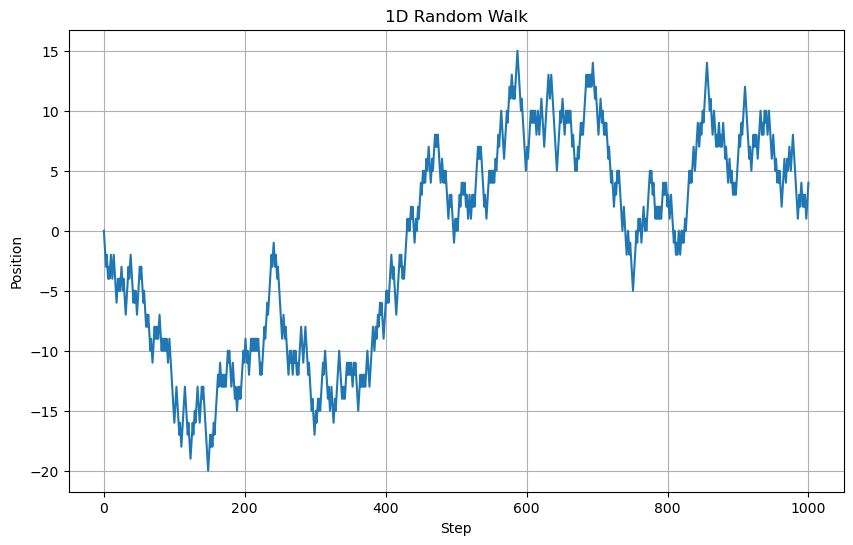

In [6]:

## Python Implementation

import random
import matplotlib.pyplot as plt

def random_walker_1d(steps):
    """
    Simulates a 1D random walk.
    
    Parameters:
    - steps: Number of steps the walker will take.
    
    Returns:
    - A list representing the positions of the walker at each step.
    """
    position = 0
    positions = [position]

    for _ in range(steps):
        step = random.choice([-1, 1])  # Walker can step left (-1) or right (+1)
        position += step
        positions.append(position)

    return positions

# Parameters
steps = 1000

# Run the random walker
positions = random_walker_1d(steps)

# Plot the random walk
plt.figure(figsize=(10, 6))
plt.plot(positions)
plt.title("1D Random Walk")
plt.xlabel("Step")
plt.ylabel("Position")
plt.grid(True)
plt.show()


# 2D Random Walker

In a 2D random walk, a walker moves on a two-dimensional grid. Each step of the walker is randomly chosen from a set of four possible directions: left, right, up, or down. The goal is to describe this process mathematically.

## Mathematical Definition

Let \(\mathbf{X}_n = (X_n^1, X_n^2)\) represent the position of the walker at step \(n\). Here, \(X_n^1\) and \(X_n^2\) denote the x and y coordinates of the walker, respectively.

### Position Update

The position of the walker after \(n+1\) steps, denoted by \(\mathbf{X}_{n+1}\), is updated from the previous position \(\mathbf{X}_n\) by adding a random vector \(\mathbf{\delta}_n\):

$$
\mathbf{X}_{n+1} = \mathbf{X}_n + \mathbf{\delta}_n
$$

where \(\mathbf{\delta}_n\) is a random vector that represents the step taken. This vector can be one of the following four possibilities, each with equal probability:

$$
\mathbf{\delta}_n \in \{(1, 0), (-1, 0), (0, 1), (0, -1)\}
$$

### Possible Moves

Each of these vectors corresponds to a move in one of the four directions:

- \((1, 0)\): Move right
- \((-1, 0)\): Move left
- \((0, 1)\): Move up
- \((0, -1)\): Move down

### Initial Position

The walker starts at the origin of the coordinate system:

$$
\mathbf{X}_0 = (0, 0)
$$

### Summary

To summarize, the 2D random walk is defined by the following process:

1. Start at the initial position \(\mathbf{X}_0 = (0, 0)\).
2. At each step \(n\), update the position \(\mathbf{X}_n\) by adding a random vector \(\mathbf{\delta}_n\) from the set \(\{(1, 0), (-1, 0), (0, 1), (0, -1)\}\).
3. Repeat this process for \(n\) steps.

This process models a random walk in two dimensions, where each step is taken with equal probability in one of the four cardinal directions.


# 2D Random Walker with Gaussian Noise

In a 2D random walk with Gaussian noise, each step of the walker not only moves in one of the four cardinal directions but also includes a noise component that is drawn from a Gaussian distribution. This noise component adds randomness to the movement, making the model more realistic in capturing uncertain or noisy environments.

## Mathematical Definition

Let \(\mathbf{X}_n = (X_n^1, X_n^2)\) represent the position of the walker at step \(n\). Here, \(X_n^1\) and \(X_n^2\) denote the x and y coordinates of the walker, respectively.

### Position Update

The position of the walker after \(n+1\) steps, denoted by \(\mathbf{X}_{n+1}\), is updated from the previous position \(\mathbf{X}_n\) by adding a random vector \(\mathbf{\delta}_n\) and a Gaussian noise vector \(\mathbf{N}_n\):

$$
\mathbf{X}_{n+1} = \mathbf{X}_n + \mathbf{\delta}_n + \mathbf{N}_n
$$

where:
- \(\mathbf{\delta}_n\) is a random vector representing the deterministic step.
- \(\mathbf{N}_n\) is the Gaussian noise vector with mean \(0\) and covariance matrix \(\sigma^2 \mathbf{I}\), where \(\mathbf{I}\) is the identity matrix and \(\sigma^2\) is the variance of the noise.

### Gaussian Noise

The Gaussian noise vector \(\mathbf{N}_n\) is drawn from a 2D Gaussian distribution:

$$
\mathbf{N}_n \sim \mathcal{N}\left(\mathbf{0}, \sigma^2 \mathbf{I}\right)
$$

where \(\mathcal{N}\) denotes the Gaussian distribution, \(\mathbf{0}\) is the mean vector (which is \((0, 0)\) in this case), and \(\sigma^2 \mathbf{I}\) is the covariance matrix. Each component of \(\mathbf{N}_n\) is independently drawn from a normal distribution with mean \(0\) and variance \(\sigma^2\).

### Possible Moves

The deterministic component \(\mathbf{\delta}_n\) can be one of the following four possibilities, each with equal probability:

$$
\mathbf{\delta}_n \in \{(1, 0), (-1, 0), (0, 1), (0, -1)\}
$$

Each vector represents a move in one of the four directions:

- \((1, 0)\): Move right
- \((-1, 0)\): Move left
- \((0, 1)\): Move up
- \((0, -1)\): Move down

### Initial Position

The walker starts at the origin of the coordinate system:

$$
\mathbf{X}_0 = (0, 0)
$$

### Summary

To summarize, the 2D random walk with Gaussian noise is defined by the following process:

1. Start at the initial position \(\mathbf{X}_0 = (0, 0)\).
2. At each step \(n\), update the position \(\mathbf{X}_n\) by adding a deterministic random vector \(\mathbf{\delta}_n\) and a Gaussian noise vector \(\mathbf{N}_n\):
   $$
   \mathbf{X}_{n+1} = \mathbf{X}_n + \mathbf{\delta}_n + \mathbf{N}_n
   $$
3. The Gaussian noise \(\mathbf{N}_n\) is drawn from a Gaussian distribution with mean \(0\) and variance \(\sigma^2\).

This process models a random walk in two dimensions with added Gaussian noise, making it more suitable for scenarios where movements are subject to random fluctuations.


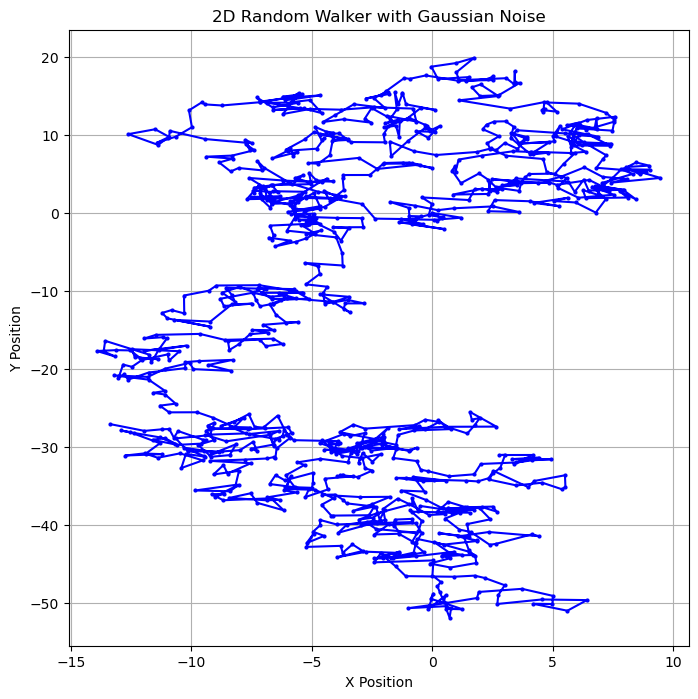

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def random_step():
    """Return a random step from one of four possible directions."""
    steps = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    return steps[np.random.choice(4)]

def gaussian_noise(sigma):
    """Generate Gaussian noise with mean 0 and standard deviation sigma."""
    return np.random.normal(0, sigma, 2)

def random_walker_2d(num_steps, sigma):
    """Simulate a 2D random walk with Gaussian noise."""
    # Initialize position
    position = np.zeros((num_steps + 1, 2))
    
    for i in range(num_steps):
        # Update position with random step
        step = random_step()
        noise = gaussian_noise(sigma)
        position[i + 1] = position[i] + np.array(step) + noise
    
    return position

# Parameters
num_steps = 1000  # Number of steps in the random walk
sigma = 0.5       # Standard deviation of the Gaussian noise

# Run simulation
positions = random_walker_2d(num_steps, sigma)

# Plot results
plt.figure(figsize=(8, 8))
plt.plot(positions[:, 0], positions[:, 1], marker='o', markersize=2, linestyle='-', color='b')
plt.title('2D Random Walker with Gaussian Noise')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.show()


# Markov Chain Monte Carlo (MCMC)

Markov Chain Monte Carlo (MCMC) is a class of algorithms used to sample from a probability distribution when direct sampling is difficult. The primary idea behind MCMC is to use a Markov chain to generate samples that approximate the desired distribution.

## Key Concepts

### Markov Chain

A Markov chain is a sequence of random variables where the distribution of each variable depends only on the previous one. Mathematically, this can be represented as:

$$
P(X_{n+1} = x_{n+1} \mid X_n = x_n, X_{n-1} = x_{n-1}, \ldots, X_0 = x_0) = P(X_{n+1} = x_{n+1} \mid X_n = x_n)
$$

### Monte Carlo Methods

Monte Carlo methods rely on random sampling to obtain numerical results. In the context of MCMC, these methods are used to estimate properties of a probability distribution by sampling from it.

### Metropolis-Hastings Algorithm

The Metropolis-Hastings algorithm is one of the most popular MCMC methods. It generates a Markov chain that converges to a target distribution.

#### Algorithm Steps

1. **Initialization**: Start with an initial state \( x_0 \).

2. **Proposal Distribution**: Propose a new state \( x^* \) from a proposal distribution \( q(x^* \mid x) \).

3. **Acceptance Criterion**: Compute the acceptance ratio:

$$
\alpha = \frac{p(x^*) \cdot q(x \mid x^*)}{p(x) \cdot q(x^* \mid x)}
$$

where \( p(x) \) is the target distribution. Accept the new state \( x^* \) with probability:

$$
\text{Accept} \text{ with probability } \min(1, \alpha)
$$

4. **Iteration**: Repeat steps 2-3 for a number of iterations to generate a sequence of samples.

